
# CS5228 Project - Team not found




In [1]:
# import packages

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import category_encoders as ce
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from geopy.distance import geodesic
import geopy

## Load Data

In [2]:
path = './'

cleaned_train_df = pd.read_csv(path + 'data/clean_train.csv', index_col = 0)
cleaned_test_df = pd.read_csv(path + 'data/clean_test.csv', index_col = 0)

## Data Information

In [3]:
# duplicate dataset
train_df = cleaned_train_df.copy()
test_df = cleaned_test_df.copy()

In [4]:
print(train_df.shape)
print(test_df.shape)

(26048, 16)
(7500, 15)


In [5]:
train_df.head()
# train_df[train_df['model'].isnull()]

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
0,2,1,3,4.0,4,0,32,1.239337,103.837487,0,11.0,151.0,2336.0,10,0,5390000.0
1,1,0,3,3.0,11,0,20,1.319533,103.847030,1,23.0,24.0,1259.0,10,0,2310000.0
2,2,1,4,3.0,11,0,20,1.315656,103.844445,1,10.0,235.0,1959.0,9,0,5279500.0
3,2,1,3,2.0,14,1,1,1.329367,103.905791,1,92.0,237.0,883.0,2,0,1843600.0
4,1,0,3,3.0,15,1,1,1.309176,103.911352,1,6.0,36.0,1066.0,3,0,2262700.0


In [6]:
print(train_df.dtypes)

type                     int64
model                    int64
bedrooms                 int64
bathrooms              float64
district                 int64
region                   int64
planning_area            int64
lat                    float64
lng                    float64
freehold                 int64
since_built_year       float64
no_of_units            float64
area_size              float64
since_listing_month      int64
additional_rooms         int64
price                  float64
dtype: object


In [7]:
train_df.describe(include = 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
count,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,2.604800e+04
mean,1.464105,0.497082,2.547720,2.281826,12.211609,0.819218,17.493666,1.321145,103.846138,0.402756,24.528140,466.408477,1248.918612,3.938920,0.078432,2.994669e+06
std,0.498719,0.559363,1.102333,1.150483,7.020134,1.363174,10.677163,0.038569,0.049865,0.490462,29.916885,419.711808,1066.075377,2.023548,0.271414,4.324294e+06
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.239337,103.696215,0.000000,-1.000000,1.000000,226.000000,2.000000,0.000000,5.566000e+05
25%,1.000000,0.000000,2.000000,1.000000,7.000000,0.000000,9.000000,1.296472,103.820262,0.000000,5.000000,134.000000,678.000000,3.000000,0.000000,1.331000e+06
50%,1.000000,0.000000,3.000000,2.000000,11.000000,0.000000,17.000000,1.313384,103.843081,0.000000,9.000000,376.000000,958.000000,3.000000,0.000000,1.851800e+06
75%,2.000000,1.000000,3.000000,3.000000,18.000000,1.000000,26.000000,1.341210,103.879673,1.000000,37.000000,646.000000,1356.000000,5.000000,0.000000,2.948000e+06
max,2.000000,3.000000,9.000000,10.000000,28.000000,4.000000,38.000000,1.456436,103.976016,1.000000,223.000000,2203.000000,15000.000000,19.000000,2.000000,7.480000e+07


In [8]:
test_df.describe(include= 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms
count,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.46680,0.500933,2.548800,2.278267,12.328800,0.829067,17.436933,1.321499,103.845887,0.416133,24.822000,463.934933,1243.848933,3.916800,0.074400
std,0.49893,0.560394,1.107211,1.131697,6.998287,1.373305,10.590192,0.038504,0.049830,0.492949,29.437414,419.488594,1042.264937,1.955093,0.267471
min,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.239337,103.695609,0.000000,-1.000000,6.000000,337.000000,2.000000,0.000000
25%,1.00000,0.000000,2.000000,1.000000,7.000000,0.000000,9.000000,1.297150,103.819293,0.000000,6.000000,130.000000,688.000000,3.000000,0.000000
50%,1.00000,0.000000,2.000000,2.000000,11.000000,0.000000,17.000000,1.313062,103.842768,0.000000,9.000000,376.000000,958.000000,3.000000,0.000000
75%,2.00000,1.000000,3.000000,3.000000,18.000000,1.000000,26.000000,1.341303,103.880561,1.000000,37.000000,660.000000,1356.000000,5.000000,0.000000
max,2.00000,3.000000,10.000000,8.000000,28.000000,4.000000,38.000000,1.451400,103.980549,1.000000,223.000000,2203.000000,13950.000000,14.000000,2.000000


In [9]:
# check for duplicate listing
# exact duplicate (from current attributes)
train_df[train_df.bathrooms==10]

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
17707,1,0,4,10.0,3,0,22,1.282961,103.839815,0,92.0,774.0,5479.0,3,1,19360000.0


## Data Pre-processing

In [10]:
# convert binary to binary encoding
# type: condo: 1 apartment:0
train_df['type'] = train_df['type'] -1
test_df['type'] = test_df['type'] -1
# freehold: 1: freehold 0:leasehold

In [11]:
# normalize numerical values
# min-max normalization: lat, lng, additional_rooms 
scaler = MinMaxScaler()
train_df[['lat', 'lng', 'additional_rooms']] = scaler.fit_transform(train_df[['lat', 'lng', 'additional_rooms']]) 

# transform test dataset 
test_df[['lat', 'lng', 'additional_rooms']] = scaler.transform(test_df[['lat', 'lng', 'additional_rooms']])
test_df.describe(include = 'all')
# maybe use singapores own lat, lng range for range
# need to document the min, max and bound test dataset that exceeds limits to min max in training
test_df.loc[test_df.lat > 1, 'lat'] = 1
test_df.loc[test_df.lat < 0, 'lat'] = 0

test_df.loc[test_df.lng > 1, 'lng'] = 1
test_df.loc[test_df.lng < 0, 'lng'] = 0

# may come back to the null value definition here!!!!

# standardization: bedrooms, bathrooms, built year, area size, listing, no_of_units
scaler = StandardScaler()
train_df[['bedrooms', 'bathrooms', 'since_built_year', 
          'no_of_units', 'area_size', 'since_listing_month']] = scaler.fit_transform(train_df[['bedrooms', 'bathrooms', 'since_built_year', 'no_of_units', 'area_size', 'since_listing_month']]) 

# transform test dataset 
test_df[['bedrooms', 'bathrooms', 'since_built_year', 
          'no_of_units', 'area_size', 'since_listing_month']] = scaler.transform(test_df[['bedrooms', 'bathrooms', 'since_built_year', 'no_of_units', 'area_size', 'since_listing_month']]) 

# train_df
test_df.describe(include = 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms
count,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.46680,0.500933,0.000980,-0.003094,12.328800,0.829067,17.436933,0.378456,0.534922,0.416133,0.009823,-0.005894,-0.004756,-0.010932,0.037200
std,0.49893,0.560394,1.004444,0.983690,6.998287,1.373305,10.590192,0.177358,0.178086,0.492949,0.983992,0.999487,0.977684,0.966189,0.133736
min,0.00000,0.000000,-1.404067,-1.114184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.853318,-1.096984,-0.855414,-0.958197,0.000000
25%,0.00000,0.000000,-0.496883,-1.114184,7.000000,0.000000,9.000000,0.266300,0.439878,0.000000,-0.619332,-0.801538,-0.526163,-0.464006,0.000000
50%,0.00000,0.000000,-0.496883,-0.244968,11.000000,0.000000,17.000000,0.339591,0.523777,0.000000,-0.519053,-0.215410,-0.272893,-0.464006,0.000000
75%,1.00000,1.000000,0.410302,0.624249,18.000000,1.000000,26.000000,0.469677,0.658847,1.000000,0.416892,0.461258,0.100446,0.524376,0.000000
max,1.00000,3.000000,6.760594,4.970332,28.000000,4.000000,38.000000,0.976802,1.000000,1.000000,6.634236,4.137660,11.914097,4.972096,1.000000


In [12]:
# categorical values
# binary: type, freehold, 
# nominal: model, district, region, planning area

# One Hot Encoding: model, region
# model: 0:apartment 1:condominium 2:executive condo 3:landed
# region: 0:central 1:east 2:north 3:north-east 4:north

# Create object for one-hot encoding
enc1 = OneHotEncoder()
dummy1 = pd.DataFrame(enc1.fit_transform(train_df[['model']]).toarray(), columns = ['model_0', 'model_1', 'model_2', 'model_3'])
# merge with main df 
train_df = train_df.join(dummy1)

enc2 = OneHotEncoder()
dummy2 = pd.DataFrame(enc2.fit_transform(train_df[['region']]).toarray(), columns = ['region_0', 'region_1', 'region_2', 'region_3', 'region_4'])
# merge with main df 
train_df = train_df.join(dummy2)

train_df = train_df.drop(columns = ['model', 'region'])
train_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,price,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,0.410302,1.493466,4,32,0.000000,0.504903,0,-0.452199,-0.751503,...,5390000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.410302,0.624249,11,20,0.369401,0.539009,1,-0.051081,-1.054097,...,2310000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1.317486,0.624249,11,20,0.351540,0.529769,1,-0.485626,-0.551361,...,5279500.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.410302,-0.244968,14,1,0.414697,0.749020,1,2.255354,-0.546596,...,1843600.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.410302,0.624249,15,1,0.321693,0.768894,1,-0.619332,-1.025505,...,2262700.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1,0.410302,0.624249,8,15,0.320402,0.596331,0,-0.318493,0.318300,...,2750000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26044,1,0.410302,0.624249,10,34,0.354335,0.460952,1,2.255354,-1.070775,...,6449300.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,1,-0.496883,-0.244968,18,33,0.469677,0.918986,0,-0.552479,-0.394108,...,1306800.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26046,1,1.317486,0.624249,22,13,0.443210,0.165124,0,-0.619332,0.647103,...,2420000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# test dataset
temp = pd.DataFrame(enc1.transform(test_df[['model']]).toarray(), columns = ['model_0', 'model_1', 'model_2', 'model_3'])
test_df = test_df.join(temp)
temp = pd.DataFrame(enc2.transform(test_df[['region']]).toarray(), columns = ['region_0', 'region_1', 'region_2', 'region_3', 'region_4'])
test_df = test_df.join(temp)
test_df = test_df.drop(columns = ['model', 'region'])

In [14]:
test_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,additional_rooms,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,-0.496883,-0.244968,10,6,0.341915,0.382426,1,1.252556,0.408840,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.410302,-0.244968,15,15,0.272228,0.672597,1,-0.619332,-0.801538,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-1.404067,-1.114184,15,1,0.361653,0.760150,1,-0.519053,-0.737207,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-0.496883,-1.114184,17,23,0.546606,0.963223,0,2.255354,-0.091513,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1.317486,3.231899,1,10,0.175666,0.547546,0,-0.652759,0.103863,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1,-1.404067,-1.114184,3,31,0.231567,0.518446,0,-0.051081,0.060975,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7496,1,-0.496883,-0.244968,15,15,0.263810,0.610629,0,0.015773,0.644720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7497,0,0.410302,-0.244968,23,3,0.626063,0.219142,0,2.255354,-0.934965,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7498,1,-0.496883,-1.114184,28,29,0.733540,0.637659,0,-0.786465,0.639955,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Target Encoding: district, planning area
#Create target encoding object
encoder=ce.TargetEncoder(cols='district') 
train_df['district']  = encoder.fit_transform(train_df['district'],train_df['price'])
# fit test data
test_df['district'] = encoder.transform(test_df['district'])

test_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,additional_rooms,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,-0.496883,-0.244968,4.747940e+06,6,0.341915,0.382426,1,1.252556,0.408840,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.410302,-0.244968,3.062476e+06,15,0.272228,0.672597,1,-0.619332,-0.801538,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-1.404067,-1.114184,3.062476e+06,1,0.361653,0.760150,1,-0.519053,-0.737207,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-0.496883,-1.114184,1.385455e+06,23,0.546606,0.963223,0,2.255354,-0.091513,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1.317486,3.231899,4.858799e+06,10,0.175666,0.547546,0,-0.652759,0.103863,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1,-1.404067,-1.114184,2.023896e+06,31,0.231567,0.518446,0,-0.051081,0.060975,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7496,1,-0.496883,-0.244968,3.062476e+06,15,0.263810,0.610629,0,0.015773,0.644720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7497,0,0.410302,-0.244968,1.359181e+06,3,0.626063,0.219142,0,2.255354,-0.934965,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7498,1,-0.496883,-1.114184,1.264884e+06,29,0.733540,0.637659,0,-0.786465,0.639955,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
encoder=ce.TargetEncoder(cols='planning_area') 
train_df['planning_area']  = encoder.fit_transform(train_df['planning_area'],train_df['price'])
# fit test data
test_df['planning_area'] = encoder.transform(test_df['planning_area'])

In [17]:
# standardize the label to have zero mean and 1 std
# standardization: bedrooms, bathrooms, built year, area size, listing, no_of_units
scaler = StandardScaler()
train_df[['district', 'planning_area']] = scaler.fit_transform(train_df[['district', 'planning_area']]) 

# transform test dataset 
test_df[['district', 'planning_area']] = scaler.transform(test_df[['district', 'planning_area']]) 


In [68]:
# save full(22) train df
filepath = './data/full-train.csv'
train_df.to_csv(filepath)

# save full(22) test df
filepath = './data/full-test.csv'
test_df.to_csv(filepath)

In [ ]:
# show confusion matrix for current variables
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap-22features.jpeg')

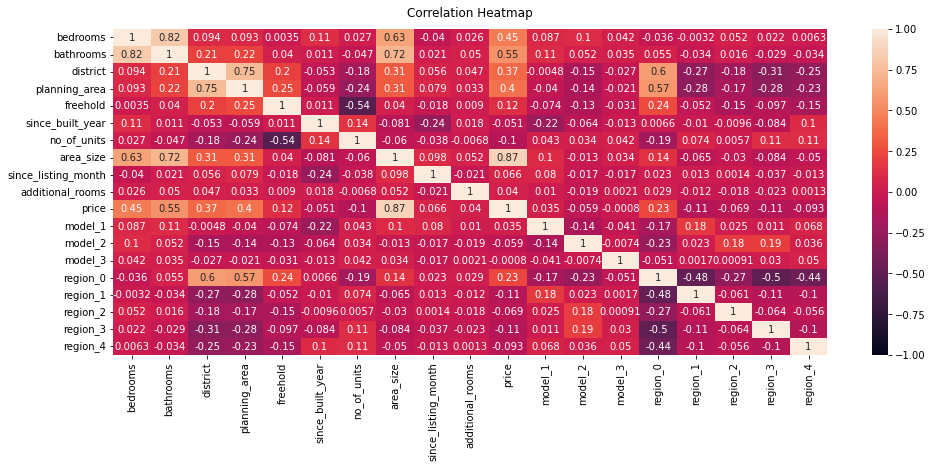

In [19]:
# consider to drop type, lat, lng, model 0 since high correlation within independent variables.
reduced_df = train_df[train_df.columns[~train_df.columns.isin(['type', 'lat', 'lng', 'model_0'])]]


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(reduced_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap-18features.jpeg')

In [20]:
reduced_test = test_df[test_df.columns[~test_df.columns.isin(['type', 'lat', 'lng', 'model_0'])]]

### Compute facilities within given radius

In [21]:
# load data from csv
commercial_center = pd.read_csv(path + 'data/auxiliary-data/sg-commerical-centres.csv')
hawker_center = pd.read_csv(path + 'data/auxiliary-data/sg-gov-markets-hawker-centres.csv')
primary_school = pd.read_csv(path + 'data/auxiliary-data/sg-primary-schools.csv')
secondary_school = pd.read_csv(path + 'data/auxiliary-data/sg-secondary-schools.csv')
shopping_malls = pd.read_csv(path + 'data/auxiliary-data/sg-shopping-malls.csv')
train_station = pd.read_csv(path + 'data/auxiliary-data/sg-train-stations.csv')

In [22]:
# compute distance between locations
def compute_distance(lat1, lng1, lat2, lng2):
    c1 = (lat1, lng1)
    c2 = (lat2, lng2)
    return(geopy.distance.geodesic(c1, c2).km)

In [23]:
lat = cleaned_train_df.lat
lng = cleaned_train_df.lng

In [ ]:
compute_distance(lat[0], lng[0], lat[1], lng[1])

In [24]:
def np_vec_impl(lat, lng, df, i):
    return np.vectorize(compute_distance)(lat, lng, df['lat'][i], df['lng'][i])

In [25]:
def compute_auxiliary(lat, lng):
    # initialization
    near_cc = np.zeros(len(lat))
    near_hc = np.zeros(len(lat))
    near_ps = np.zeros(len(lat))
    near_ss = np.zeros(len(lat))
    near_sm = np.zeros(len(lat))
    near_ts = np.zeros(len(lat))
    
    dist_cc = np.zeros(len(lat))+1000
    dist_hc = np.zeros(len(lat))+1000
    dist_ps = np.zeros(len(lat))+1000
    dist_ss = np.zeros(len(lat))+1000
    dist_sm = np.zeros(len(lat))+1000
    dist_ts = np.zeros(len(lat))+1000
    
    for i in range(len(hawker_center)):
        d = np_vec_impl(lat, lng, hawker_center, i)
        within = d < 1.5
        dist_hc[(d < dist_hc)] = d[(d < dist_hc)]
        near_hc[within] += 1
    
    for i in range(len(commercial_center)):
        d = np_vec_impl(lat, lng, commercial_center, i)
        within = d < 3.0
        dist_cc[(d < dist_cc)] = d[(d < dist_cc)]
        near_cc[within] += 1
    
    for i in range(len(primary_school)):
        d = np_vec_impl(lat, lng, primary_school, i)
        within = d < 3.0
        dist_ps[(d < dist_ps)] = d[(d < dist_ps)]
        near_ps[within] += 1
    
    for i in range(len(secondary_school)):
        d = np_vec_impl(lat, lng, secondary_school, i)
        within = d < 3.0
        dist_ss[(d < dist_ss)] = d[(d < dist_ss)]
        near_ss[within] += 1
        
    for i in range(len(shopping_malls)):
        d = np_vec_impl(lat, lng, shopping_malls, i)
        within = d < 2.0
        dist_sm[(d < dist_sm)] = d[(d < dist_sm)]
        near_sm[within] += 1


    for i in range(len(train_station)):
        d = np_vec_impl(lat, lng, train_station, i)
        within = d < 1.5
        dist_ts[(d < dist_ts)] = d[(d < dist_ts)]
        near_ts[within] += 1
        
    d = {'num_comercial_3km': near_cc, 'num_hawker_1.5km': near_hc, 'num_primary_3km': near_ps, 'num_secondary_3km': near_ss, 'num_mall_2km': near_sm, 'num_mrt_1.5km': near_ts}

    num_of_amenties_test = pd.DataFrame(data=d)
    
    d = {'closest_comercial': dist_cc, 'closest_hawker': dist_hc,'closest_primary': dist_ps, 'closest_secondary': dist_ss,'closest_mall': dist_sm, 'closest_mrt': dist_ts}

    closest_distance_test = pd.DataFrame(data=d)
    return num_of_amenties_test, closest_distance_test

In [ ]:
near_cc = np.zeros(len(lat))
near_hc = np.zeros(len(lat))
near_ps = np.zeros(len(lat))
near_ss = np.zeros(len(lat))
near_sm = np.zeros(len(lat))
near_ts = np.zeros(len(lat))

In [ ]:
dist_cc = np.zeros(len(lat))+1000
dist_hc = np.zeros(len(lat))+1000
dist_ps = np.zeros(len(lat))+1000
dist_ss = np.zeros(len(lat))+1000
dist_sm = np.zeros(len(lat))+1000
dist_ts = np.zeros(len(lat))+1000

In [ ]:
for i in range(len(hawker_center)):
    d = np_vec_impl(hawker_center, i)
    within = d < 1.5
    dist_hc[(d < dist_hc)] = d[(d < dist_hc)]
    near_hc[within] += 1

In [ ]:
for i in range(len(commercial_center)):
    d = np_vec_impl(commercial_center, i)
    within = d < 3.0
    dist_cc[(d < dist_cc)] = d[(d < dist_cc)]
    near_cc[within] += 1

In [ ]:
for i in range(len(primary_school)):
    d = np_vec_impl(primary_school, i)
    within = d < 3.0
    dist_ps[(d < dist_ps)] = d[(d < dist_ps)]
    near_ps[within] += 1
    
for i in range(len(secondary_school)):
    d = np_vec_impl(secondary_school, i)
    within = d < 3.0
    dist_ss[(d < dist_ss)] = d[(d < dist_ss)]
    near_ss[within] += 1

In [ ]:
for i in range(len(shopping_malls)):
    d = np_vec_impl(shopping_malls, i)
    within = d < 2.0
    dist_sm[(d < dist_sm)] = d[(d < dist_sm)]
    near_sm[within] += 1
    
    
for i in range(len(train_station)):
    d = np_vec_impl(train_station, i)
    within = d < 1.5
    dist_ts[(d < dist_ts)] = d[(d < dist_ts)]
    near_ts[within] += 1

In [ ]:
# dataframe to store number of amenties

d = {'num_comercial_3km': near_cc, 'num_hawker_1.5km': near_hc, 'num_primary_3km': near_ps, 'num_secondary_3km': near_ss, 'num_mall_2km': near_sm, 'num_mrt_1.5km': near_ts}

num_of_amenties = pd.DataFrame(data=d)
num_of_amenties

In [ ]:
d = {'closest_comercial': dist_cc, 'closest_hawker': dist_hc,'closest_primary': dist_ps, 'closest_secondary': dist_ss,'closest_mall': dist_sm, 'closest_mrt': dist_ts}

closest_distance = pd.DataFrame(data=d)
closest_distance

In [ ]:
# save the dataframe as csv
import os
filepath = './data/auxiliary-number-amenties.csv'
num_of_amenties.to_csv(filepath, index=True)

filepath = './data/auxiliary-distance-amenties.csv'
closest_distance.to_csv(filepath, index=True)

In [26]:
# load data back
num_of_amenties = pd.read_csv('./data/auxiliary-number-amenties.csv', index_col=0)
closest_distance = pd.read_csv('./data/auxiliary-distance-amenties.csv', index_col=0)
num_of_amenties

,num_comercial_3km,num_hawker_1.5km,num_primary_3km,num_secondary_3km,num_mall_2km,num_mrt_1.5km
0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.0,17.0,10.0,12.0,5.0
2,3.0,5.0,16.0,7.0,35.0,4.0
3,1.0,2.0,17.0,9.0,2.0,5.0
4,1.0,4.0,12.0,10.0,8.0,2.0
...,...,...,...,...,...,...
26043,3.0,7.0,13.0,6.0,18.0,9.0
26044,1.0,0.0,13.0,11.0,15.0,3.0
26045,3.0,1.0,19.0,17.0,7.0,3.0
26046,2.0,1.0,13.0,12.0,5.0,2.0


In [27]:
num_scaler = StandardScaler()
num_of_amenties[num_of_amenties.columns] = num_scaler.fit_transform(num_of_amenties) 

In [28]:
dis_scaler = StandardScaler()
closest_distance[closest_distance.columns] = dis_scaler.fit_transform(closest_distance) 

In [ ]:
closest_distance

In [ ]:
#!!!!!still need to add features for test dataset !!!!!
lat = cleaned_test_df.lat
lng = cleaned_test_df.lng

num_of_amenties_test, closest_distance_test = compute_auxiliary(lat, lng)
num_of_amenties_test

In [ ]:
filepath = './data/auxiliary-number-amenties-test.csv'
num_of_amenties_test.to_csv(filepath, index=True)

filepath = './data/auxiliary-distance-amenties-test.csv'
closest_distance_test.to_csv(filepath, index=True)

In [29]:
# load data back
num_of_amenties_test = pd.read_csv('./data/auxiliary-number-amenties-test.csv', index_col=0)
closest_distance_test = pd.read_csv('./data/auxiliary-distance-amenties-test.csv', index_col=0)

In [30]:
# transform test dataset using the scaler above
num_of_amenties_test[num_of_amenties_test.columns] = num_scaler.transform(num_of_amenties_test) 
closest_distance_test[closest_distance_test.columns] = dis_scaler.transform(closest_distance_test) 

### Centrality of MRT stations

In [32]:
import re
# clean mrt info
raw_mrt_df = pd.read_csv('./data/auxiliary-data/train-station-chinese-names.csv')
mrt_df = raw_mrt_df[['stn_code', 'mrt_station_english', 'mrt_line_english']]
# mrt_df.sort_values(by=['stn_code'])
mrt_df['line_code'] = mrt_df['stn_code'].apply(lambda x : " ".join(re.findall("[a-zA-Z]+", x)))
line_list = mrt_df.line_code.unique()

/tmp/ipykernel_500204/3754845553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrt_df['line_code'] = mrt_df['stn_code'].apply(lambda x : " ".join(re.findall("[a-zA-Z]+", x)))


In [33]:
# join with mrt lat lng info
train_station_info = pd.merge(mrt_df, train_station, left_on='mrt_station_english', right_on='name')
train_station_info = train_station_info[['stn_code', 'name', 'line_code', 'lat', 'lng']]
train_station_info

,stn_code,name,line_code,lat,lng
0,NS1,Jurong East,NS,1.333152,103.742286
1,EW24,Jurong East,EW,1.333152,103.742286
2,NS2,Bukit Batok,NS,1.349033,103.749566
3,NS3,Bukit Gombak,NS,1.358761,103.751893
4,NS4,Choa Chu Kang,NS,1.385361,103.744341
...,...,...,...,...,...
182,PW3,Punggol Point,PW,1.416848,103.906650
183,PW4,Samudera,PW,1.415901,103.902156
184,PW5,Nibong,PW,1.411870,103.900313
185,PW6,Sumang,PW,1.408452,103.898558


In [34]:
import networkx as nx
G = nx.DiGraph()
mrt_names = list(train_station_info.name.unique())
G.add_nodes_from(mrt_names)

In [35]:
import re
def return_number(txt):
    l = re.findall(r'\d+', txt)
    if len(l) == 0:
        l = 0
    else:
        l = l[0]
    return int(l)

In [36]:
# remove duplicates
stn = ['Choa Chu Kang', 'Sengkang', 'Punggol','Bukit Panjang']
for s in stn:
    print (train_station_info[(train_station_info.name == s)])

  stn_code           name line_code       lat         lng
4      NS4  Choa Chu Kang        NS  1.385361  103.744341
5      NS4  Choa Chu Kang        NS  1.384836  103.744553
6      BP1  Choa Chu Kang        BP  1.385361  103.744341
7      BP1  Choa Chu Kang        BP  1.384836  103.744553
   stn_code      name line_code       lat         lng
89     NE16  Sengkang        NE  1.391609  103.895442
90     NE16  Sengkang        NE  1.391694  103.895484
91      STC  Sengkang       STC  1.391609  103.895442
92      STC  Sengkang       STC  1.391694  103.895484
   stn_code     name line_code       lat         lng
93     NE17  Punggol        NE  1.405194  103.902412
94     NE17  Punggol        NE  1.404546  103.902072
95      PTC  Punggol       PTC  1.405194  103.902412
96      PTC  Punggol       PTC  1.404546  103.902072
    stn_code           name line_code       lat         lng
121      DT1  Bukit Panjang        DT  1.377909  103.763013
122      DT1  Bukit Panjang        DT  1.379001  103.76

In [37]:
idx = [5, 6, 90, 91, 94, 95, 122, 123]
train_station_info = train_station_info.drop(idx, axis= 0)
train_station_info

,stn_code,name,line_code,lat,lng
0,NS1,Jurong East,NS,1.333152,103.742286
1,EW24,Jurong East,EW,1.333152,103.742286
2,NS2,Bukit Batok,NS,1.349033,103.749566
3,NS3,Bukit Gombak,NS,1.358761,103.751893
4,NS4,Choa Chu Kang,NS,1.385361,103.744341
...,...,...,...,...,...
182,PW3,Punggol Point,PW,1.416848,103.906650
183,PW4,Samudera,PW,1.415901,103.902156
184,PW5,Nibong,PW,1.411870,103.900313
185,PW6,Sumang,PW,1.408452,103.898558


In [38]:
stn = ['Choa Chu Kang', 'Sengkang', 'Punggol','Bukit Panjang']
for s in stn:
    print (train_station_info[(train_station_info.name == s)])

  stn_code           name line_code       lat         lng
4      NS4  Choa Chu Kang        NS  1.385361  103.744341
7      BP1  Choa Chu Kang        BP  1.384836  103.744553
   stn_code      name line_code       lat         lng
89     NE16  Sengkang        NE  1.391609  103.895442
92      STC  Sengkang       STC  1.391694  103.895484
   stn_code     name line_code       lat         lng
93     NE17  Punggol        NE  1.405194  103.902412
96      PTC  Punggol       PTC  1.404546  103.902072
    stn_code           name line_code       lat         lng
121      DT1  Bukit Panjang        DT  1.377909  103.763013
124      BP6  Bukit Panjang        BP  1.379001  103.761535


In [40]:
# seperate each line
for line in line_list:
    line_mrt = train_station_info[train_station_info.line_code == line]
    line_mrt.loc[:, 'stn_code'] = line_mrt.loc[:, 'stn_code'].apply(return_number)
    line_mrt = line_mrt.set_index('stn_code').sort_index()
    for i in range(len(line_mrt.index)-1):
        dist = compute_distance(line_mrt.at[line_mrt.index[i], 'lat'], 
                                line_mrt.at[line_mrt.index[i], 'lng'], 
                                line_mrt.at[line_mrt.index[i+1], 'lat'], 
                                line_mrt.at[line_mrt.index[i+1], 'lng'])
        G.add_edge(line_mrt.at[[line_mrt.index[i]][0], 'name'], line_mrt.at[[line_mrt.index[i+1]][0], 'name'], weight = dist)
        G.add_edge(line_mrt.at[[line_mrt.index[i+1]][0], 'name'], line_mrt.at[[line_mrt.index[i]][0], 'name'], weight = dist)

NS
                       name line_code       lat         lng
stn_code                                                   
1               Jurong East        NS  1.333152  103.742286
2               Bukit Batok        NS  1.349033  103.749566
3              Bukit Gombak        NS  1.358761  103.751893
4             Choa Chu Kang        NS  1.385361  103.744341
5                   Yew Tee        NS  1.397534  103.747405
7                    Kranji        NS  1.425177  103.762165
8                 Marsiling        NS  1.432514  103.774071
9                 Woodlands        NS  1.436470  103.787208
10                Admiralty        NS  1.440584  103.800988
11                Sembawang        NS  1.449050  103.820046
13                   Yishun        NS  1.429442  103.835005
14                   Khatib        NS  1.417383  103.832980
15             Yio Chu Kang        NS  1.381755  103.844947
16               Ang Mo Kio        NS  1.369640  103.849745
17                   Bishan        NS

/home/nancyli/anaconda3/envs/CS5228/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/nancyli/anaconda3/envs/CS5228/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/nancyli/anaconda3/envs/CS5228/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is tryi

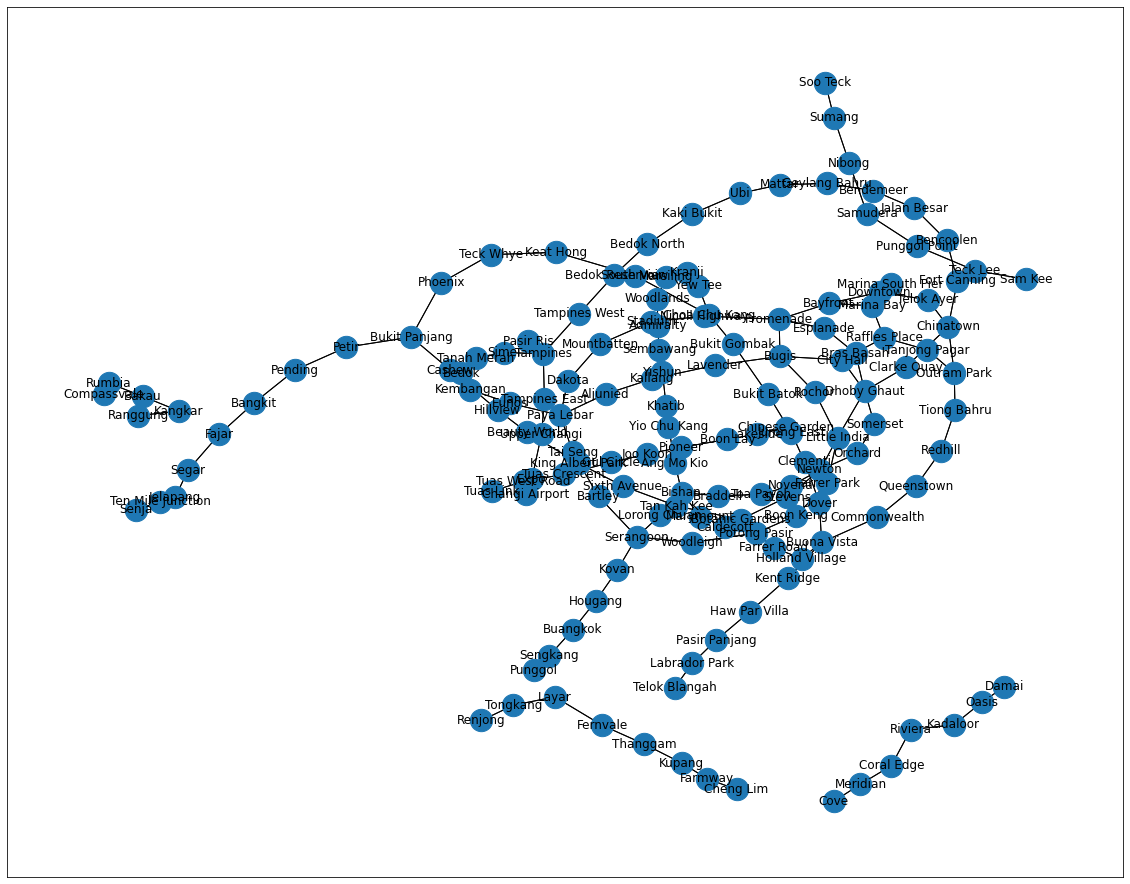

In [41]:
# convert MRT maps to graphsb
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                        node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
plt.show()

In [57]:
def calculate_new_edge(a, a_code, b, b_code):
    st1 = train_station_info[(train_station_info.name == a) & (train_station_info.line_code == a_code)]
    st2 = train_station_info[(train_station_info.name == b) & (train_station_info.line_code == b_code)]
    d = compute_distance(float(st1['lat']), float(st1['lng']), float(st2['lat']), float(st2['lng']))
    G.add_edge(a, b, weight = d)
    G.add_edge(b, a, weight = d)

In [58]:
calculate_new_edge('Sengkang','STC', 'Compassvale','SE')
calculate_new_edge('Sengkang','STC', 'Ranggung','SE')
calculate_new_edge('Sengkang','STC', 'Cheng Lim','SW')
calculate_new_edge('Sengkang','STC', 'Renjong','SW')

In [60]:
calculate_new_edge('Punggol','PTC', 'Damai','PE')
calculate_new_edge('Punggol','PTC', 'Cove','PE')
calculate_new_edge('Punggol','PTC', 'Soo Teck','PW')
calculate_new_edge('Punggol','PTC', 'Sam Kee','PW')

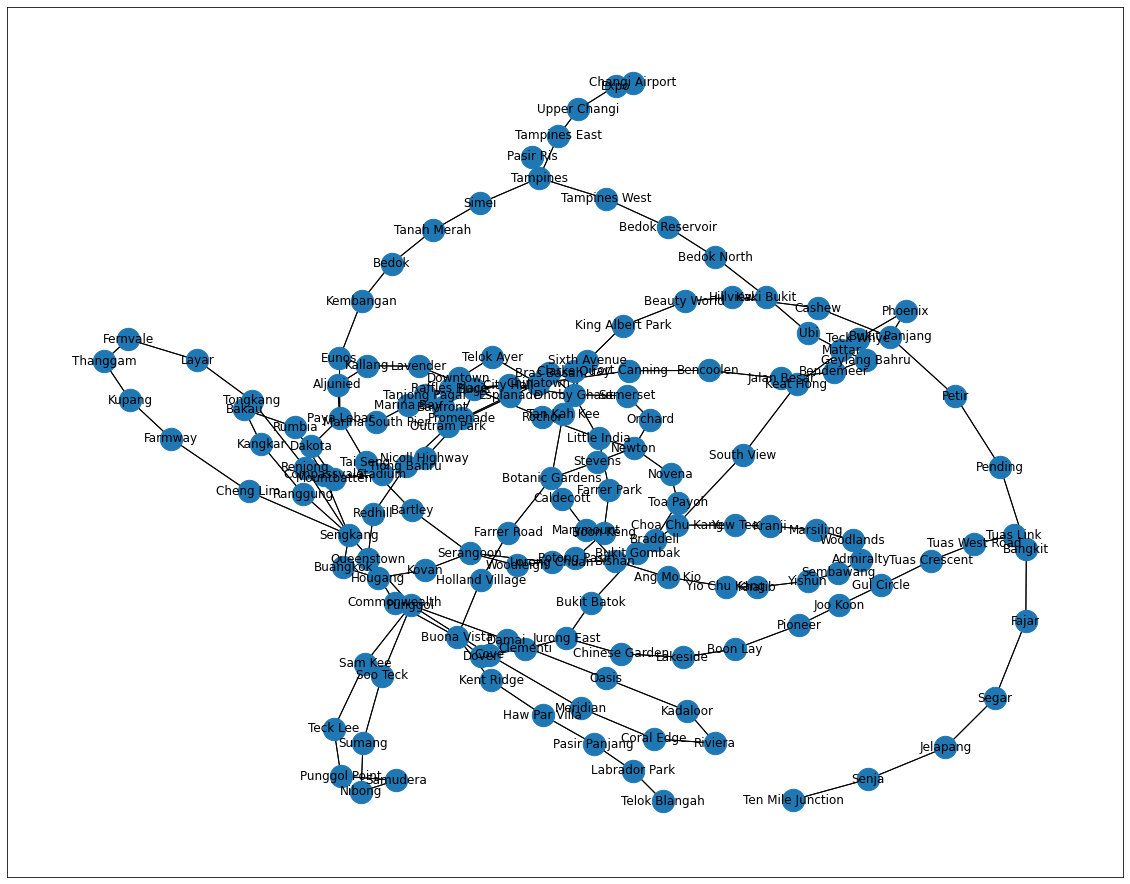

In [62]:
# convert MRT maps to graphsb
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                        node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
plt.show()

In [66]:
# save mrt graph
nx.write_gpickle(G, "./data/mrt_graph.gpickle")
# G = nx.read_gpickle("./data/mrt_graph.gpickle")

### calculate centrality 

In [65]:
# use closeness
import operator
sorted(nx.centrality.closeness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)

[('Botanic Gardens', 0.11755725190839694),
 ('Bishan', 0.11684370257966616),
 ('Serangoon', 0.1163141993957704),
 ('Little India', 0.11596385542168675),
 ('Caldecott', 0.11561561561561562),
 ('Marymount', 0.11458333333333333),
 ('Lorong Chuan', 0.11441307578008915),
 ('Newton', 0.11382113821138211),
 ('Stevens', 0.1130690161527166),
 ('Braddell', 0.10992148465381871),
 ('Farrer Road', 0.10984308131241084),
 ('Dhoby Ghaut', 0.1097647897362794),
 ('Farrer Park', 0.1097647897362794),
 ('Novena', 0.10929737402413059),
 ('Woodleigh', 0.10914245216158752),
 ('Bartley', 0.10906515580736544),
 ('Kovan', 0.1088339222614841),
 ('Rochor', 0.10814606741573034),
 ('Tan Kah Kee', 0.10784313725490197),
 ('Boon Keng', 0.1076923076923077),
 ('Toa Payoh', 0.10754189944134078),
 ('Ang Mo Kio', 0.10650069156293222),
 ('Potong Pasir', 0.10642709053213545),
 ('Tai Seng', 0.10440677966101695),
 ('Holland Village', 0.1043360433604336),
 ('Orchard', 0.10412440838404327),
 ('Bugis', 0.10349462365591398),
 ('Som

In [67]:
sorted(nx.centrality.betweenness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)

[('Serangoon', 0.43818012053306177),
 ('Botanic Gardens', 0.34947797300738476),
 ('Kovan', 0.3236567354214413),
 ('Sengkang', 0.3200916730328495),
 ('Bishan', 0.31696092578445517),
 ('Hougang', 0.3157626687038452),
 ('Buangkok', 0.3076988371106018),
 ('Lorong Chuan', 0.27361429420252953),
 ('Buona Vista', 0.23649944826415417),
 ('Little India', 0.21742494977789129),
 ('Caldecott', 0.21365192541663133),
 ('Marymount', 0.21263333616274796),
 ('Paya Lebar', 0.19179611238434757),
 ('Farrer Road', 0.18175027586792294),
 ('Holland Village', 0.17555385790679912),
 ('Punggol', 0.17129275952805365),
 ('Bartley', 0.16720708485414382),
 ('Tai Seng', 0.16180290297937372),
 ('Jurong East', 0.1607956313838667),
 ('Tan Kah Kee', 0.16072489601901366),
 ('Newton', 0.15654302124890362),
 ('Dover', 0.15553292023880264),
 ('Dhoby Ghaut', 0.15325665619783266),
 ('Sixth Avenue', 0.1509209744503862),
 ('Clementi', 0.1481481481481482),
 ('King Albert Park', 0.1414141414141414),
 ('Eunos', 0.13760150524856407)

## Linear Regression Model

In [ ]:
# x y split
X_train = train_df.drop(columns = ['price'])
y_train = train_df['price']

# reduced train
X_train_red = reduced_df.drop(columns = ['price'])
y_train_red = reduced_df['price']

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### All features - linear regression

In [ ]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
all_r2_scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
all_rmse = cross_val_score(lm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)

In [ ]:
lm.fit(X_train, y_train)
lm.coef_

In [ ]:
plot_feature_importance(lm.coef_,X_train.columns,'Linear Regression with 22 features (zoomed out)')
plt.savefig('Linear Regression with 22 features (zoomed out).jpeg')

In [ ]:
plot_feature_importance(lm.coef_,X_train.columns,'Linear Regression with 22 features (zoomed in)')
plt.xlim(-3*10**(6), 3*10**(6))
plt.savefig('Linear Regression with 22 features (zoomed in).jpeg')

## Reduced Features

In [ ]:
lm_red = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
red_r2_scores = cross_val_score(lm_red, X_train_red, y_train_red, scoring='r2', cv=folds)
red_rmse = cross_val_score(lm_red, X_train_red, y_train_red, scoring='neg_root_mean_squared_error', cv=folds)

In [ ]:
lm_red.fit(X_train_red, y_train_red)
lm_red.coef_

In [ ]:
plot_feature_importance(lm_red.coef_,X_train_red.columns,'Linear Regression with 18 features')
plt.savefig('Linear Regression with 18 features.jpeg')

In [ ]:
# further eliminates bedroom and bathroom since relatively high correlation
x_reduced = X_train_red.drop(columns = ['bedrooms', 'bathrooms'])
lm_fred = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
fred_r2_scores = cross_val_score(lm_fred, x_reduced, y_train_red, scoring='r2', cv=folds)
fred_rmse = cross_val_score(lm_fred, x_reduced, y_train_red, scoring='neg_root_mean_squared_error', cv=folds)

In [ ]:
lm_fred.fit(x_reduced, y_train_red)
lm_fred.coef_
plot_feature_importance(lm_fred.coef_,x_reduced.columns,'Linear Regression with 16 features')
plt.savefig('Linear Regression with 16 features.jpeg')

### Auxiliary Data

In [ ]:
# number of amenties in a given radius
x_train_16_num_amenties = X_train_red.join(num_of_amenties)
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
num_r2_scores = cross_val_score(lm, x_train_16_num_amenties, y_train_red, scoring='r2', cv=folds)
num_rmse = cross_val_score(lm, x_train_16_num_amenties, y_train_red, scoring='neg_root_mean_squared_error', cv=folds)

lm.fit(x_train_16_num_amenties, y_train_red)
plot_feature_importance(lm.coef_,x_train_16_num_amenties.columns,'Linear Regression with 18 features + number of amenties in neighbourhoods')
plt.savefig('Linear Regression with 18 features with num amenties.jpeg')

In [ ]:
# number of amenties in a given radius
x_train_16_closest_amenties = X_train_red.join(closest_distance)
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dist_r2_scores = cross_val_score(lm, x_train_16_closest_amenties, y_train_red, scoring='r2', cv=folds)
dist_rmse = cross_val_score(lm, x_train_16_closest_amenties, y_train_red, scoring='neg_root_mean_squared_error', cv=folds)

lm.fit(x_train_16_closest_amenties, y_train_red)
plot_feature_importance(lm.coef_,x_train_16_closest_amenties.columns,'Linear Regression with 18 features + distance to closest amenties')
plt.savefig('Linear Regression with 18 features with dist amenties.jpeg')

In [ ]:
r2 = []
rmse = []

r2 =  [np.mean(all_r2_scores), np.mean(red_r2_scores), np.mean(fred_r2_scores), np.mean(num_r2_scores),np.mean(dist_r2_scores)]
rmse = [np.mean(all_rmse), np.mean(red_rmse), np.mean(fred_rmse), np.mean(num_rmse), np.mean(num_rmse)]

In [ ]:
# dataframe to store r2 and rmse for models

model = ['all_original_data', 'reduced_original', 'further_reduced', 'reduced_w_num_amenties', 'reduced_w_nearest_amenties']

d = {'model': model, 'R2': r2, 'RMSE': rmse}

cv_results = pd.DataFrame(data=d)

In [ ]:
cv_results['RMSE']= cv_results['RMSE'] *(-1)

In [ ]:
ax = sns.barplot(x="model", y="R2", data=cv_results, palette="Blues_d")
ax.bar_label(ax.containers[0])
plt.ylim(0.7, 0.9)
_ = plt.xticks(rotation=45)
#Add chart labels
plt.title('R2 for five models')
plt.xlabel('model names')
plt.ylabel('r2')
plt.savefig('Linear Regression models R2.jpeg')

In [ ]:
ax = sns.barplot(x="model", y="RMSE", data=cv_results, palette="Blues_d")
ax.bar_label(ax.containers[0])
plt.ylim(1.85*10**6, 2.1*10**6)
_ = plt.xticks(rotation=45)
#Add chart labels
plt.title('RMSE for five models')
plt.xlabel('model names')
plt.ylabel('rmse')
plt.savefig('Linear Regression models RMSE.jpeg')